# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

# EDA

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen,tenure and MonthlyCharges are continues feature rest are all categorical feature.

In [6]:
# Statistical Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges is stored as object, where in fact it should be float. Lets fix that. If you run the following line of code it will result in an AttributeError: 'str' object has no attribute 'astype'. This means that the column has a string value instead of a number in one of the rows. In order to pick which row, we will run the pd.value_counts() fuction.

In [8]:
# trying to catch the cause of the problem
df["TotalCharges"].value_counts()[:5]

20.2     11
         11
19.75     9
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

In [9]:
# the rows with the problem
df[df.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


there are 11 rows with TotalCharges as blank, lets fill them

In [10]:
# fill in the values causing the problem 
mode = df["TotalCharges"].mode()[1]
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: x.replace(" ", mode))

In [11]:
# convert TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [12]:
#Lets Check if it is actually corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum().sum()

0

Great no null values

#### Validate the value range of each feature

In [14]:
for i in range(1,9):
    print(df[df.columns[i]].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']


The values of all features are in the expected range according to the definition of each variable in the dataset

#### Display the balance of the class labels (Churn)

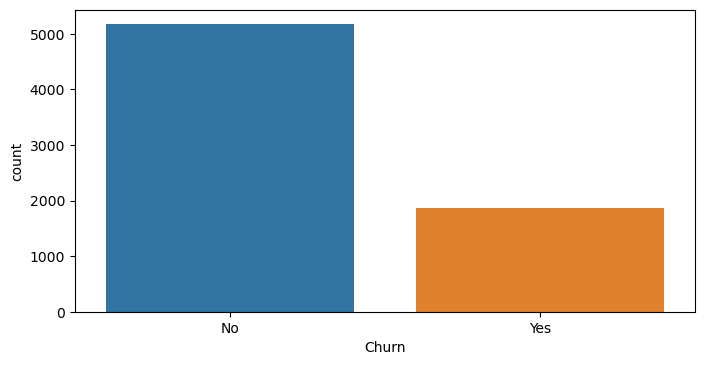

In [15]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = "Churn")
plt.show()

The classes are inbalanced, we need to take that into consideration when buildin the model.

Churn Percentages are
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


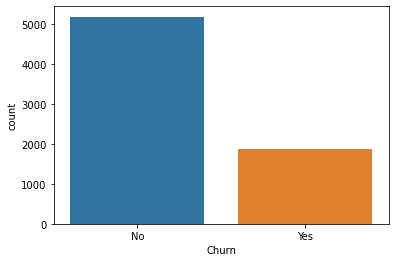

In [16]:
sns.countplot(df.Churn);
print ('Churn Percentages are\n',df.Churn.value_counts() / df.Churn.count())

The total percentage of chrun isn't much but we will explore it more.

In [17]:
cols = ['MonthlyCharges', 'TotalCharges']

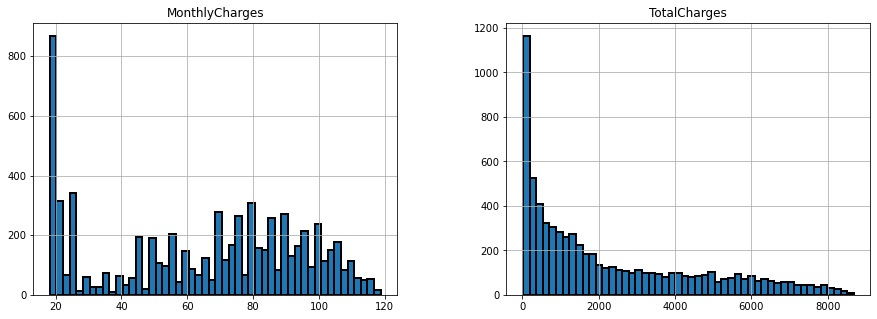

In [18]:
df[cols].hist(bins=50, figsize=(15,5), edgecolor='black', linewidth=2)
plt.show()

The more users pay per month, the higher the likelihood of leaving, in other words, the most profitable customers leave for an unknown reason

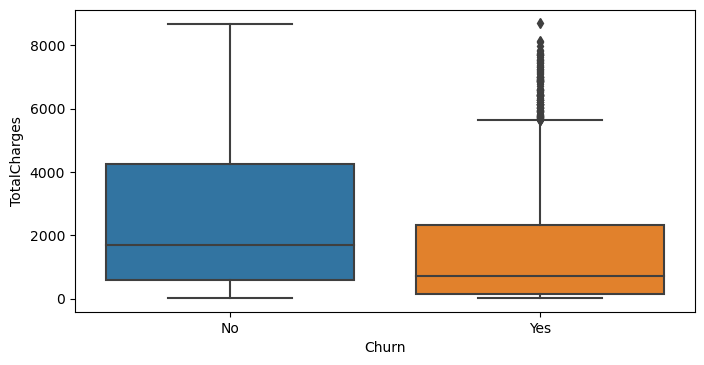

In [19]:
# The distrbution of TotalCharges between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = "Churn", y = "TotalCharges")
plt.show()

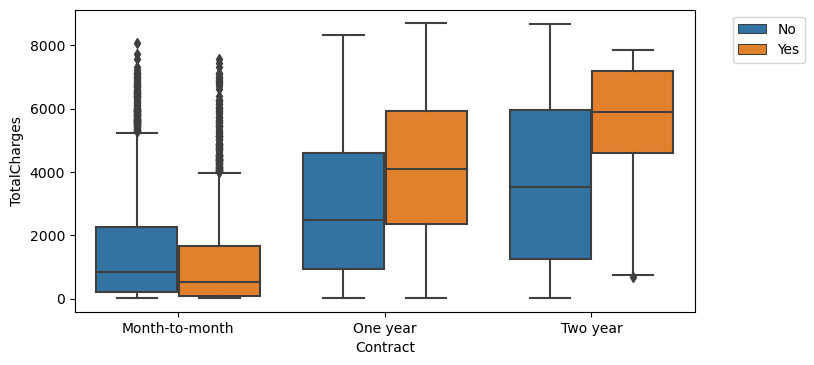

In [20]:
#The distribution of TotalCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = "Contract", y = "TotalCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

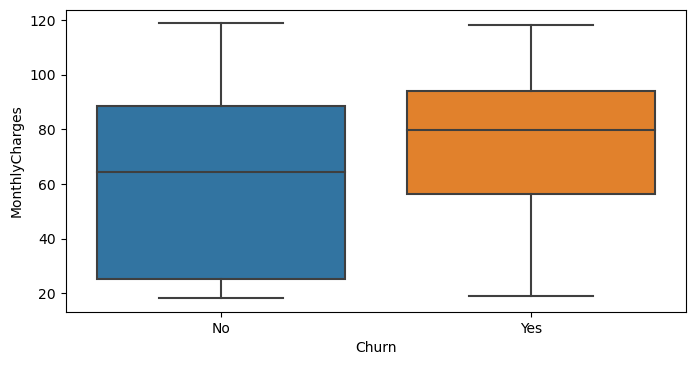

In [21]:
# The distrbution of MonthlyCharges between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = "Churn", y = "MonthlyCharges")
plt.show()

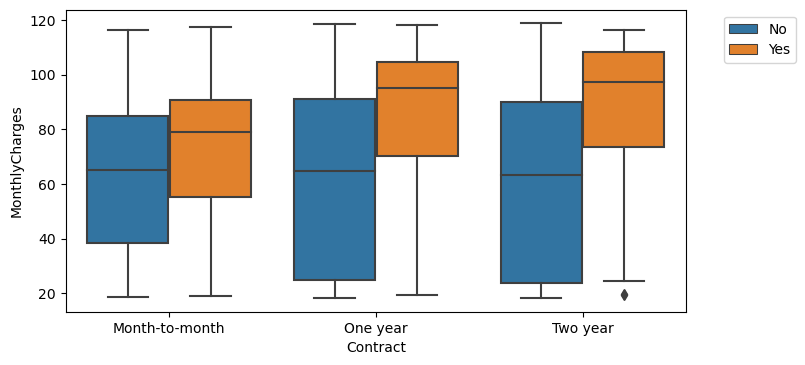

In [22]:
#The distribution of MonthlyCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = "Contract", y = "MonthlyCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

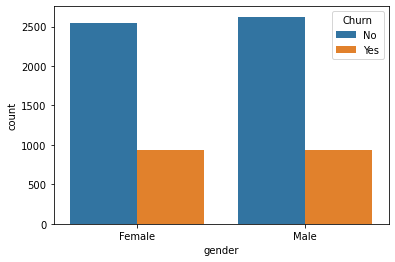

In [23]:
sns.countplot(x='gender', hue='Churn', data=df);

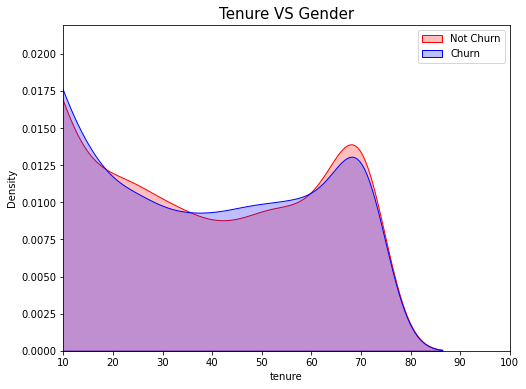

In [24]:
plt.figure(figsize=(8,6))

sns.kdeplot(df[df['gender'] == 'Male']["tenure"], color='red', shade=True)
sns.kdeplot(df[df['gender'] == 'Female']["tenure"], color='blue', shade=True) 

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

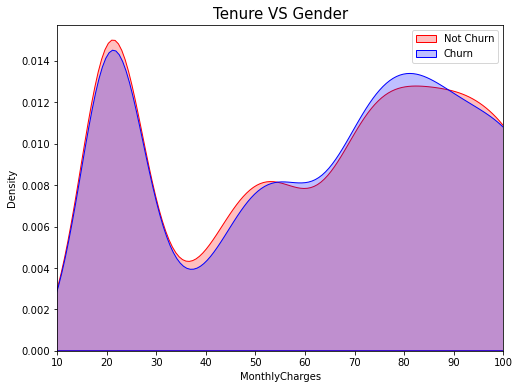

In [25]:
plt.figure(figsize=(8,6))

sns.kdeplot(df[df['gender'] == 'Male']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['gender'] == 'Female']["MonthlyCharges"], color='blue', shade=True) 

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

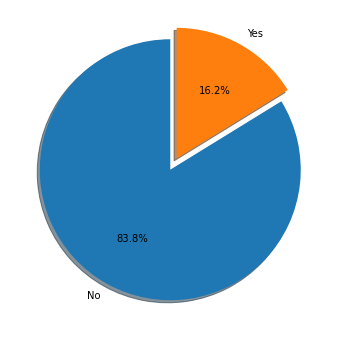

In [26]:
plt.figure(figsize=(8,6))
sizes = df.SeniorCitizen.value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

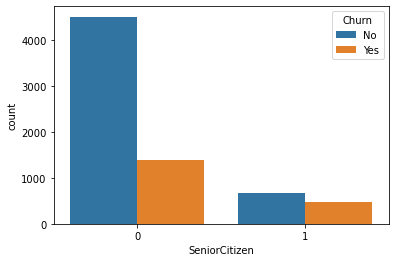

In [27]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df);

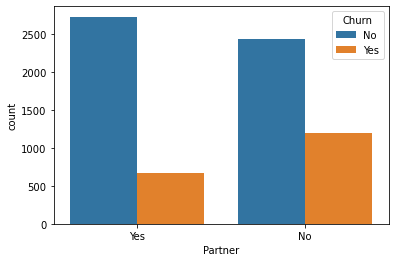

In [28]:
sns.countplot(x='Partner', hue='Churn', data=df);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

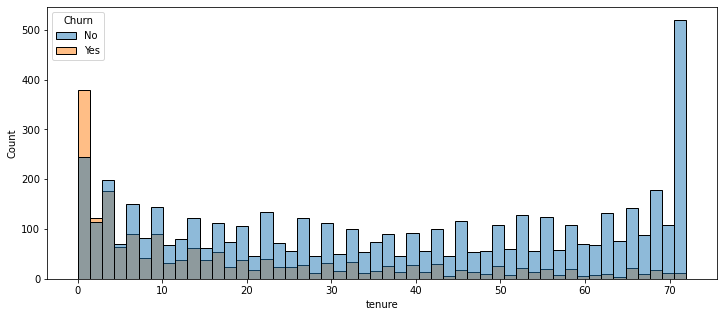

In [29]:
plt.figure(figsize=(12,5))
sns.histplot(x='tenure', hue='Churn', data=df, bins=50)

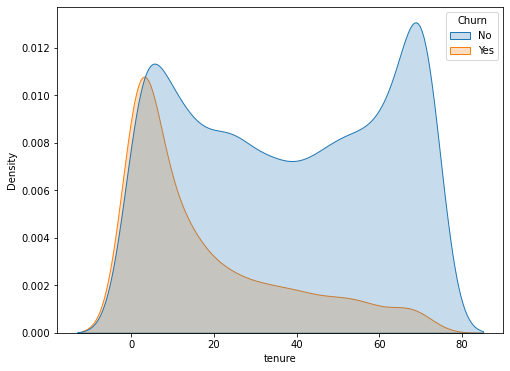

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='tenure', hue='Churn', data=df, shade=True);

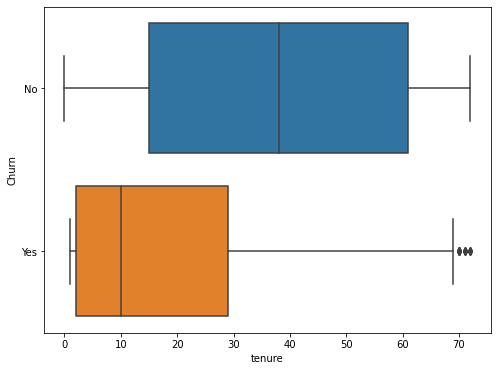

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=df);

We can tell that customers with higher tenure are less in Churn

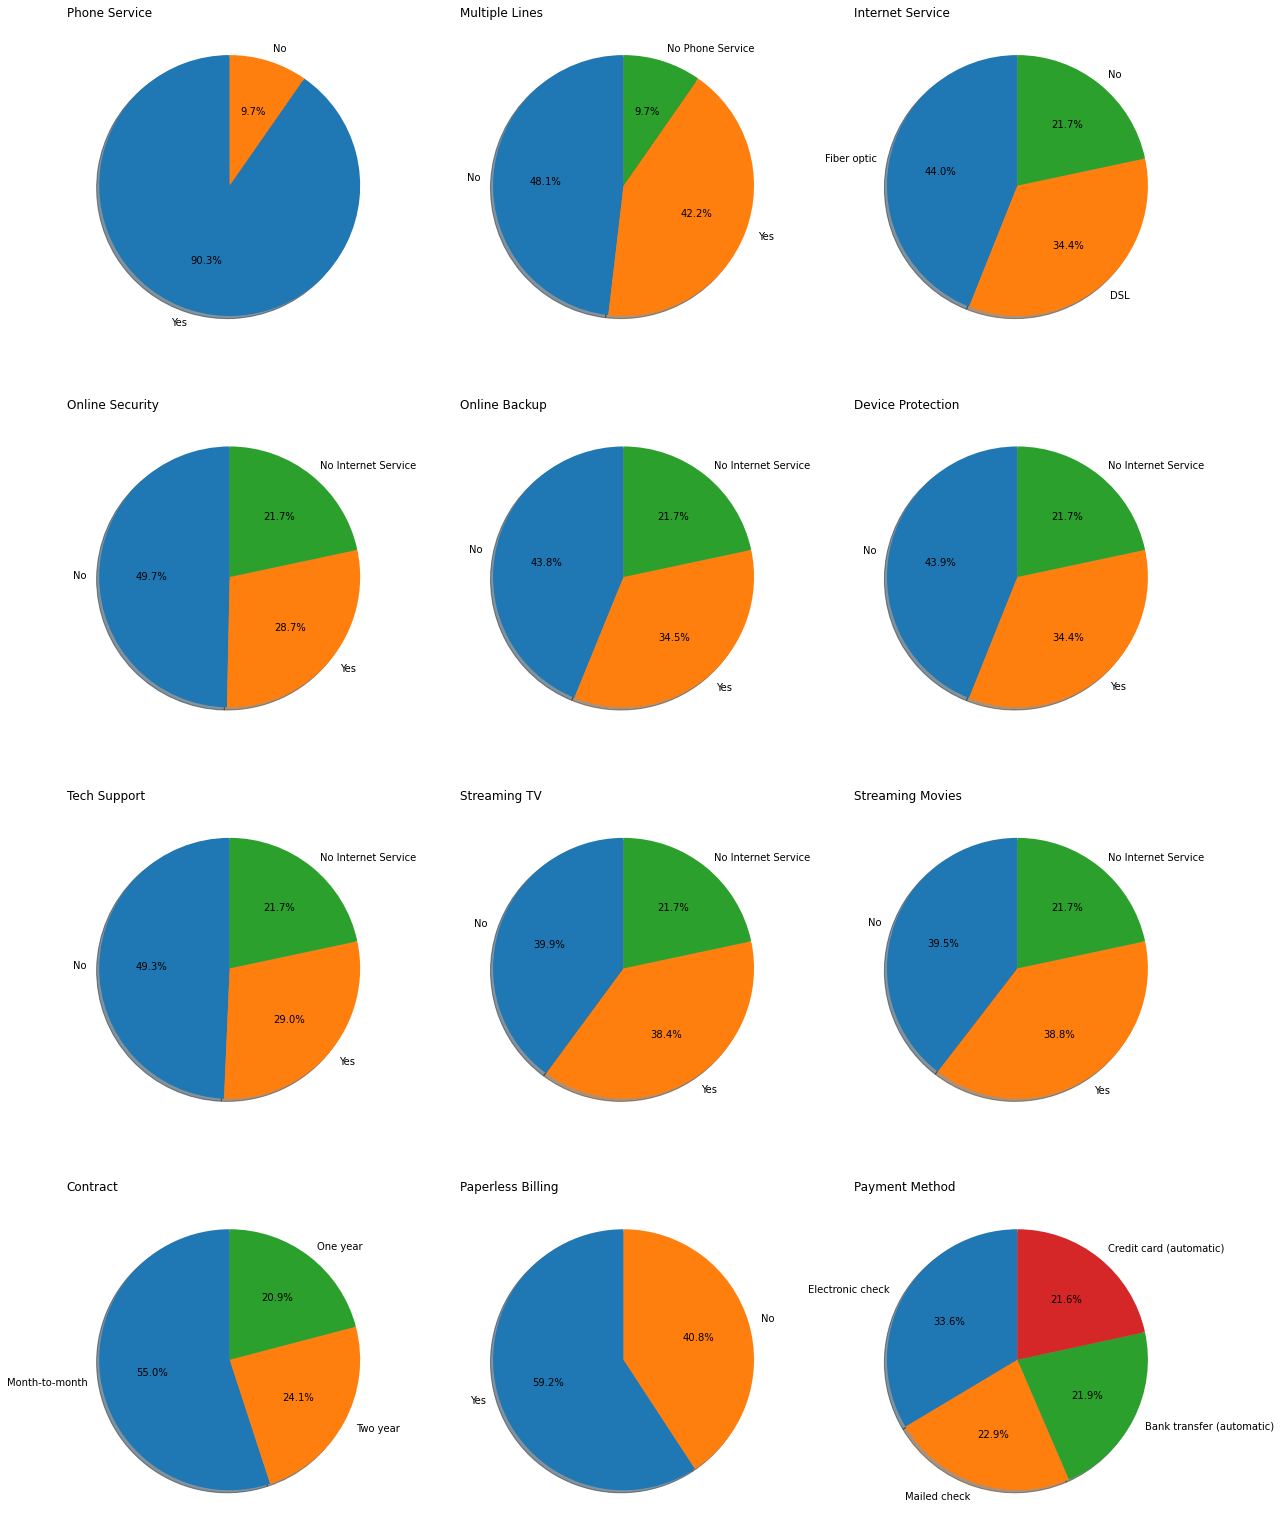

In [32]:
plt.figure(figsize=(20,42))

plt.subplot(6, 3, 1)
sizes = df.PhoneService.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Phone Service', loc='left')

plt.subplot(6, 3, 2)
sizes = df.MultipleLines.value_counts()
labels = ["No", "Yes", 'No Phone Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Multiple Lines', loc='left')

plt.subplot(6, 3, 3)
sizes = df.InternetService.value_counts()
labels = ["Fiber optic", "DSL", 'No']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Internet Service', loc='left')

plt.subplot(6, 3, 4)
sizes = df.OnlineSecurity.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Security', loc='left')

plt.subplot(6, 3, 5)
sizes = df.OnlineBackup.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Backup', loc='left')

plt.subplot(6, 3, 6)
sizes = df.DeviceProtection.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Device Protection', loc='left')

plt.subplot(6, 3, 7)
sizes = df.TechSupport.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Tech Support', loc='left')

plt.subplot(6, 3, 8)
sizes = df.StreamingTV.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming TV', loc='left')

plt.subplot(6, 3, 9)
sizes = df.StreamingMovies.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming Movies', loc='left')

plt.subplot(6, 3, 10)
sizes = df.Contract.value_counts()
labels = ["Month-to-month", "Two year", 'One year']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Contract', loc='left')

plt.subplot(6, 3, 11)
sizes = df.PaperlessBilling.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Paperless Billing', loc='left')

plt.subplot(6, 3, 12)
sizes = df.PaymentMethod.value_counts()
labels = ["Electronic check ", "Mailed check ", 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Payment Method', loc='left');

In [33]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

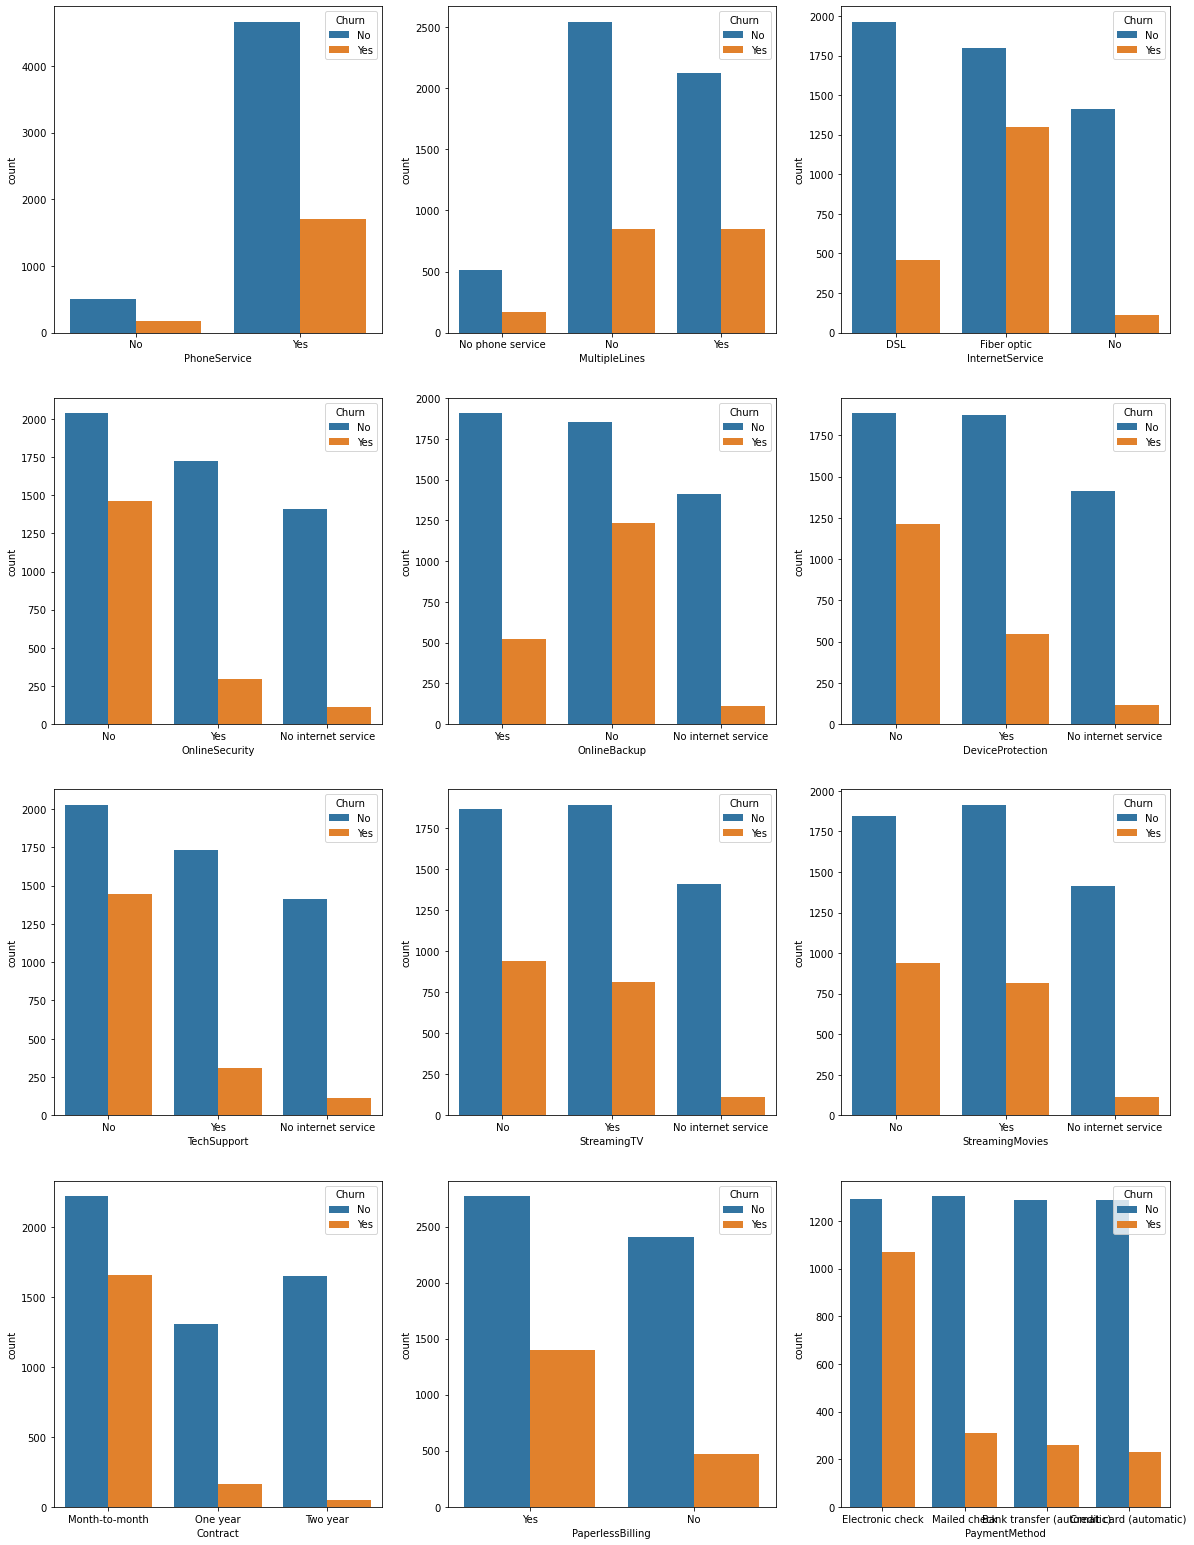

In [34]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

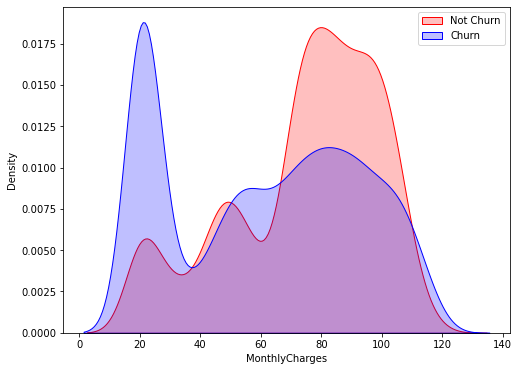

In [35]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

In [36]:
df.TotalCharges.dtype

dtype('float64')

It seems that total charges is an abject type, We need to change it to mueric before we plot it

In [37]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

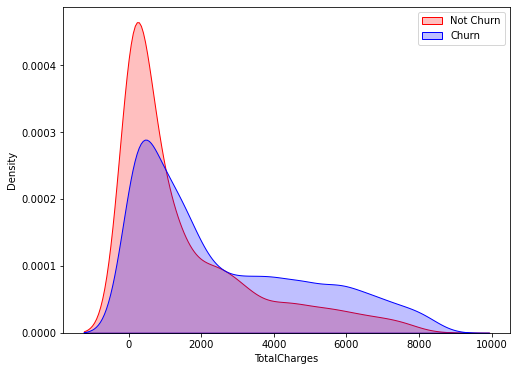

In [38]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["TotalCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["TotalCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

We can confirm that higher charges leads to churn

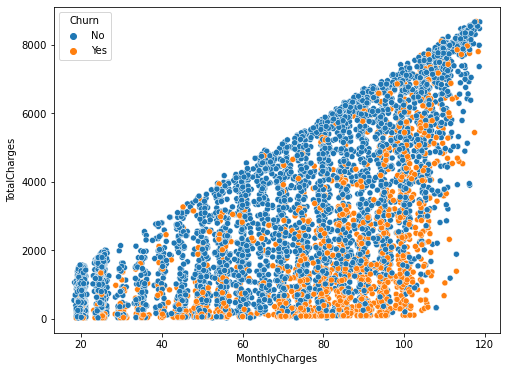

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=df);

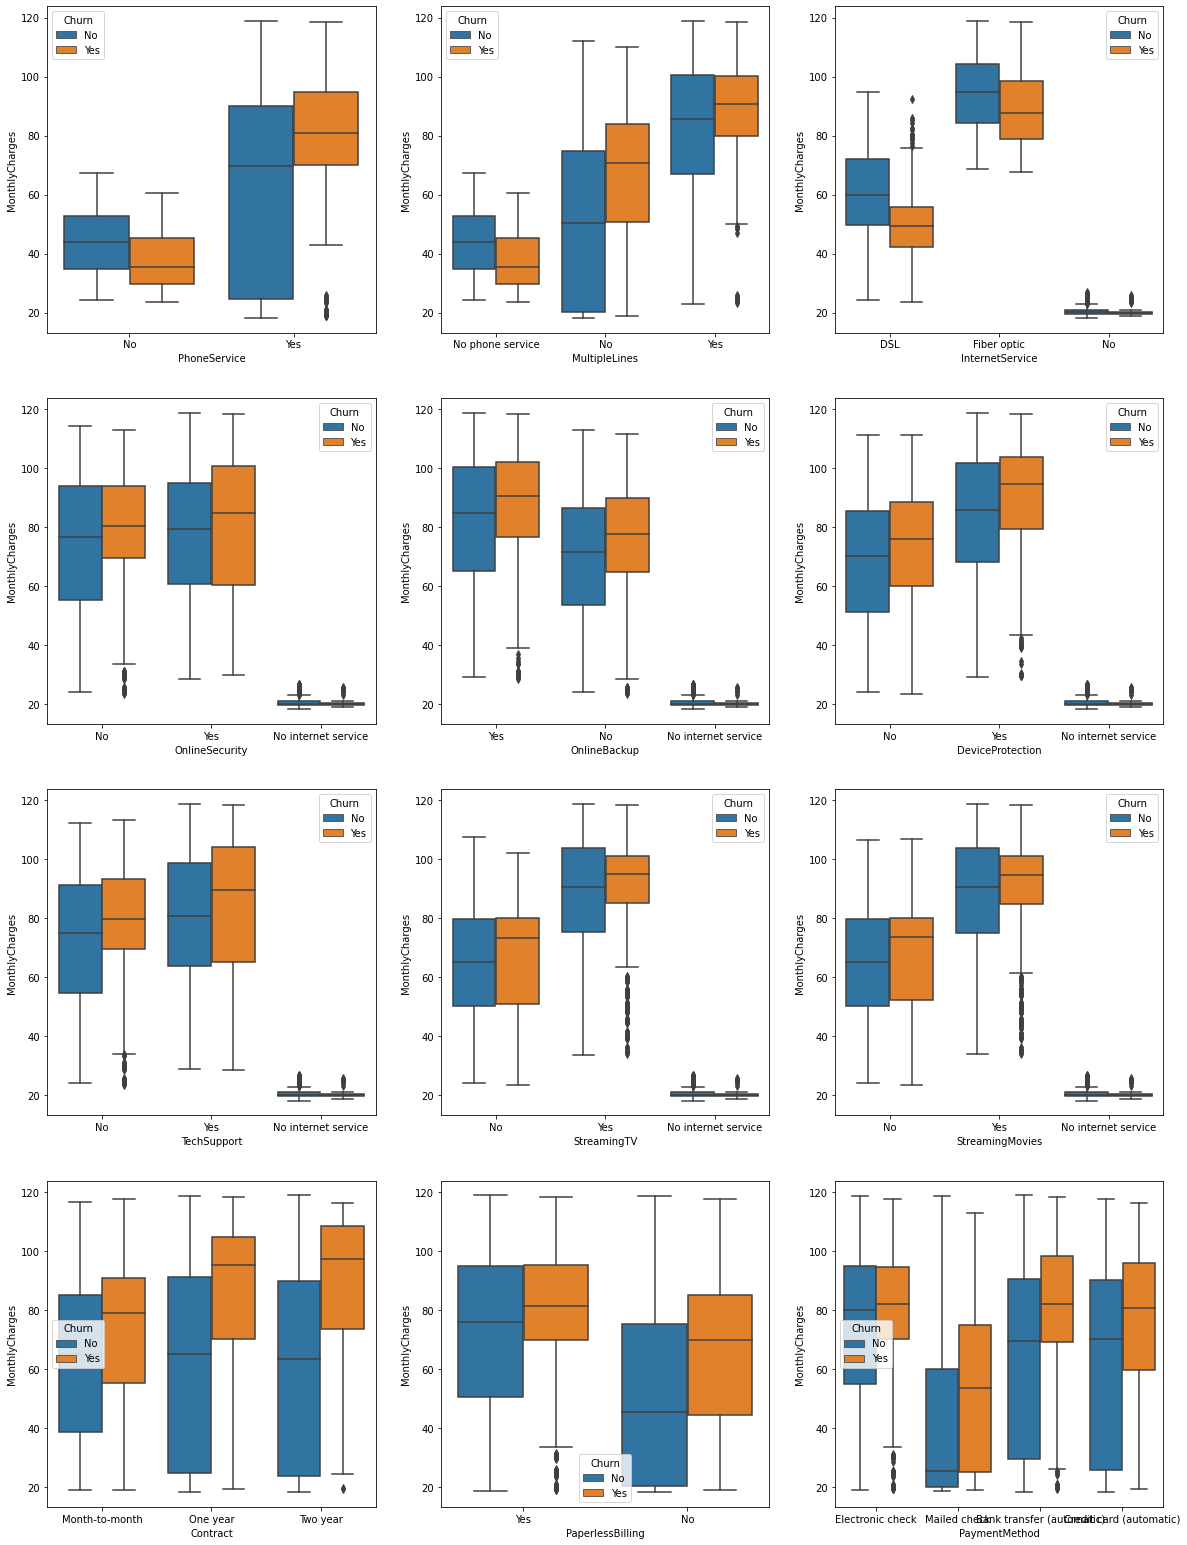

In [40]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x=key, y='MonthlyCharges',hue='Churn', data=df);

### Correlation between features

In [41]:
df.drop('customerID', axis=1, inplace=True)
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)
df = pd.get_dummies(df)


I changed the values of Chrun values of churn manually so We can plot the coreelation plot as if we let it with dummies we will have 2 columns of churn

In [42]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [43]:
df.shape

(7043, 46)

In [44]:
df.isnull().sum().sum()

0

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum().sum()

0

<AxesSubplot:>

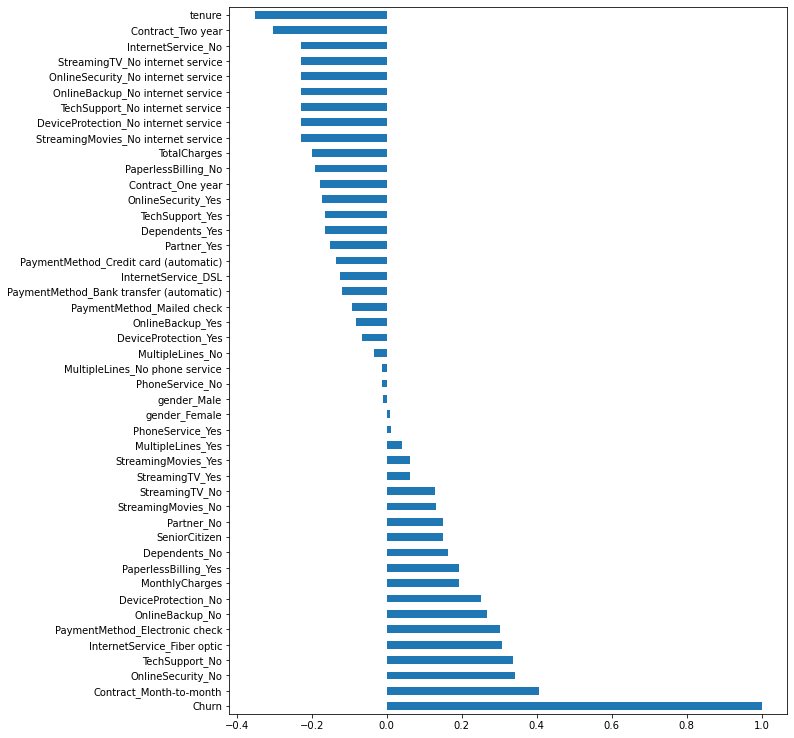

In [47]:
plt.figure(figsize=(10,13))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')

# Pre-processing

In [48]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


There are no outliers or skewness in our dataset therefore we proceed further.

In [49]:
x=df.copy()
x.drop('Churn',axis=1,inplace=True)
y=df['Churn']

### Handling Imbalanced Dataset

In [50]:
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [51]:
x,y=over.fit_resample(x,y)

### Scaling the Dataset

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [53]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Machine Learning Models

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [56]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [57]:
#Creating list of models and another list mapped to their names
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

names=['GaussianNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier',
       'XGBClassifier']

In [58]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    acc=[]
    ars=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
        acc.append(np.round(accuracy_score(p,ytest),4))
        ars.append(np.round(roc_auc_score(ytest,model.predict_proba(xtest)[:,1]),4))
        
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data['Accuracy']=acc
    data['AUC_ROC Score']=ars
    data.set_index('Model',inplace = True)
    return data

In [59]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score,Accuracy,AUC_ROC Score
Model,,,,,,,
GaussianNB,0.2014,0.2014,0.4488,0.18,0.7889,0.7986,0.8760
KNeighborsClassifier,0.1550,0.1550,0.3937,0.38,0.8263,0.8450,0.9141
LogisticRegression,0.1287,0.1287,0.3588,0.48,0.8467,0.8713,0.9469
DecisionTreeClassifier,0.1933,0.1933,0.4396,0.23,0.7983,0.8067,0.8074
RandomForestClassifier,0.1307,0.1307,0.3615,0.48,0.8508,0.8693,0.9418
AdaBoostClassifier,0.1419,0.1419,0.3766,0.43,0.8394,0.8581,0.9438
GradientBoostingClassifier,0.1256,0.1256,0.3544,0.50,0.8512,0.8744,0.9477
XGBClassifier,0.1341,0.1341,0.3662,0.46,0.8483,0.8659,0.9422


Logistic Regression, Random Forest, Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

### Random Forest

In [62]:
params={'n_estimators':[100,300,500],
           'max_features':['int','float','log2']}

g=GridSearchCV(RandomForestClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['int', 'float', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [63]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'max_features': 'log2', 'n_estimators': 500}
RandomForestClassifier(max_features='log2', n_estimators=500)
0.8507924345553212


In [64]:
m=RandomForestClassifier(max_features='log2', n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [65]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1307
Mean Squared Error is 0.1307
Root Mean Squared Error is 0.3615
R2 Score is 47.64
Mean of cross validaton Score is 85.0326
AUC_ROC Score is 0.9427
Accuracy is 0.8693


### Gradient Boost

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
params={'subsample':[0.5,1,1.5,2],
      'max_depth':[2,3,4,5,6,7,8,9,10,None]}

g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'subsample': [0.5, 1, 1.5, 2]})

In [75]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 1, 'max_depth': 6}
GradientBoostingClassifier(max_depth=6, subsample=1)
0.8571052090381988


In [76]:
m=GradientBoostingClassifier(max_depth=6, subsample=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [77]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1252
Mean Squared Error is 0.1252
Root Mean Squared Error is 0.3539
R2 Score is 49.87
Mean of cross validaton Score is 85.3611
AUC_ROC Score is 0.9495
Accuracy is 0.8748


# Finalizing the model

In [78]:
model=GradientBoostingClassifier(max_depth=6, subsample=1)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

### Evaluation Metrics

In [79]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1249
Mean Squared Error is 0.1249
Root Mean Squared Error is 0.3533
R2 Score is 50.019999999999996
Mean of cross validaton Score is 85.2935
AUC_ROC Score is 0.9495
Accuracy is 0.8751


In [80]:
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Confusion Matrix
[[1151  177]
 [ 146 1113]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1328
           1       0.86      0.88      0.87      1259

    accuracy                           0.88      2587
   macro avg       0.88      0.88      0.88      2587
weighted avg       0.88      0.88      0.88      2587



## Saving the model

In [82]:
import joblib
joblib.dump(model,'churnanalysis.obj')

['churnanalysis.obj']